In [1]:
pwd

In [2]:
import pandas as pd

In [24]:
VI = pd.read_csv('tutorial_chemflow/DockFlow/vina/vmd-rec/SORTED-uniq-lig.csv', delim_whitespace=True)
VI.name = 'vina'
PL = pd.read_csv('tutorial_chemflow/DockFlow/plants/vmd-rec/SORTED-uniq-lig.csv', delim_whitespace=True)
PL.name = 'plants'
SM = pd.read_csv('tutorial_chemflow/DockFlow/smina-vina/vmd-rec/SORTED-uniq-lig.csv', delim_whitespace=True)
SM.name = 'smina-vina'
VIN = pd.read_csv('tutorial_chemflow/DockFlow/smina-vinardo//vmd-rec/SORTED-uniq-lig.csv', delim_whitespace=True)
VIN.name = 'vinardo'
QV = pd.read_csv('tutorial_chemflow/DockFlow/qvina/vmd-rec/SORTED-uniq-lig.csv', delim_whitespace=True)
QV.name = 'qvina'

In [25]:
alldfs=[VI, PL, SM, VIN, QV]

In [26]:
# Let's remove the second column with the names of our ligand. They are already specified in the first one!

for i in alldfs:
    i.drop(columns=['LIGAND.1'], inplace=True)

In [27]:
# Let's rename the column SCORE/RMSD(SMINA-MIN) in simply "SCORE" for comodity
for i in alldfs:
    i.rename(
    columns={'SCORE/RMSD(SMINA-MIN)':"SCORE"}
          ,inplace=True)
    

In [28]:
#Let's make our negative scores positive, in order to do not have problems later on

for i in alldfs:
    i['SCORE'] = i['SCORE']*-1 
    

In [29]:
# Let's create a new column in each dataframe in which we specify the initial letter of the LIGAND name.
# This is needed to classify our compounds in true active or decoys. 
# We know that the names of our decoys start with a 'C'

for i in alldfs:
    ii = i
    ii['letter'] = i['LIGAND'].str[:1]
    classification = []
    for row in ii['letter']:
        if row == 'C' : classification.append(0) # classification for decoys
        elif row != 'C' :   classification.append(1) # classification for actives
        else:           classification.append('Error')
    ii['classification'] = classification
  


In [30]:
# Let's define the function to generate Receiver operating characteristics (ROC) 
# The number of true actives is 7 and the number of decoys in our dataset is 14. 
# If you work with different datasets remmeber to modify these values!

def roc_tutorial(df, actives=7, decoys=14):
    tp = 0
    fp = 0
    tpr = []
    fpr = []

    for c in df['classification']: 
        if c == 1:
            tp+=1
        elif c == 0:
            fp+=1
        tpr.append(tp/actives)
        fpr.append(fp/decoys)
   
    
    return tpr, fpr
    

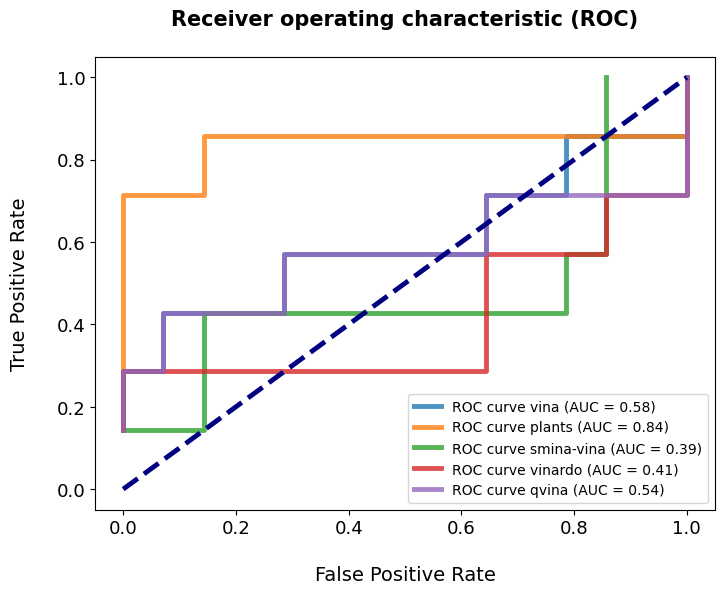

In [33]:
# Let's run the roc_tutorial function for all the tested docking programs.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=100)

lw = 3.5


for i in alldfs:
    auc = metrics.roc_auc_score(i['classification'],  i['SCORE'])
    tpr, fpr = roc_tutorial(i)
    plt.plot(fpr,tpr,label = f"ROC curve {i.name} (AUC = %0.2f)" % auc, alpha = 0.8, lw =lw)


plt.title("Receiver operating characteristic (ROC)\n", fontweight="bold", fontsize =15)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

plt.tick_params(axis='both', labelsize=13)

plt.xlabel("\nFalse Positive Rate",fontsize =14)

plt.ylabel("True Positive Rate\n",fontsize =14)

plt.legend(loc='best')

plt.savefig("ROC-plants-vina-qvina-smina.png", dpi=300, facecolor='white', transparent=False)
